In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/BoardInfinity/main/student_records.csv")
df

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


# groupby: Split-Apply-Combine

https://jakevdp.github.io/figures/split-apply-combine.svg

In [3]:
dff = pd.DataFrame({
    'key':['A','B','C','A','B','C'],
    'data':range(1,7)
})
dff

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [4]:
dff.key.unique()

array(['A', 'B', 'C'], dtype=object)

In [6]:
dff.groupby('key')

In [7]:
dff.groupby('key').sum()

,data
key,
A,5
B,7
C,9


In [8]:
dff.groupby('key').mean()

,data
key,
A,2.5
B,3.5
C,4.5


In [9]:
dff.groupby('key').max()

,data
key,
A,4
B,5
C,6


In [10]:
dff.groupby('key').std()

,data
key,
A,2.12132
B,2.12132
C,2.12132


In [11]:
dff.groupby('key').describe()

data                                         
    count mean      std  min   25%  50%   75%  max
key                                               
A     2.0  2.5  2.12132  1.0  1.75  2.5  3.25  4.0
B     2.0  3.5  2.12132  2.0  2.75  3.5  4.25  5.0
C     2.0  4.5  2.12132  3.0  3.75  4.5  5.25  6.0

In [22]:
dff.groupby('key').aggregate([min,'max','mean','median','std','var',np.std, 'count'])

data                                             
     min max mean median      std  var      std count
key                                                  
A      1   4  2.5    2.5  2.12132  4.5  2.12132     2
B      2   5  3.5    3.5  2.12132  4.5  2.12132     2
C      3   6  4.5    4.5  2.12132  4.5  2.12132     2

In [23]:
titanic = pd.read_csv("https://raw.githubusercontent.com/nitssh/nitssh/main/titanic.csv")
titanic.shape

(891, 12)

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [28]:
titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [29]:
titanic.groupby(['Sex','Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [30]:
type(titanic.groupby(['Sex','Pclass'])['Survived'].mean())

pandas.core.series.Series

In [31]:
titanic.groupby(['Sex','Pclass'])['Survived'].mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [34]:
titanic.pivot_table('Survived',index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Matplotlib

It is multi-platform data visualization library built on numpy arrays.

In [35]:
import matplotlib.pyplot as plt

In [36]:
plt.style.use('classic')
# http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

In [39]:
np.linspace(0,10,5) # generate  5 uniformly spaced values between (1,10)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [40]:
np.linspace(0,50,5)

array([ 0. , 12.5, 25. , 37.5, 50. ])

In [41]:
x = np.linspace(0,10,100)
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

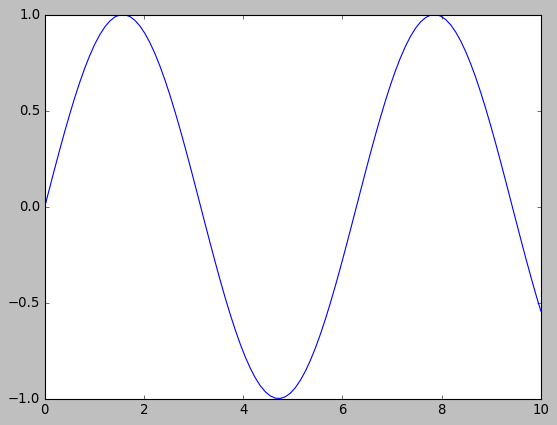

In [45]:
plt.plot(x,np.sin(x))
plt.show()

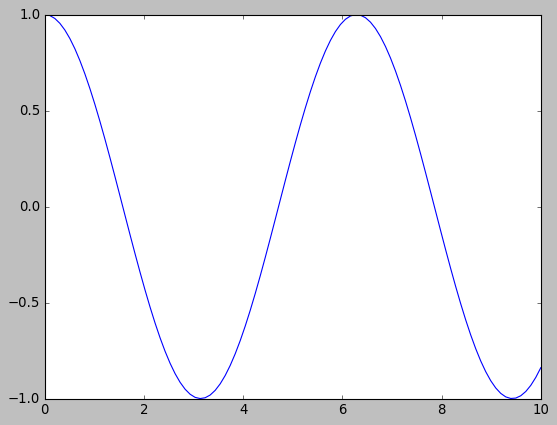

In [46]:
plt.plot(x,np.cos(x))
plt.show()

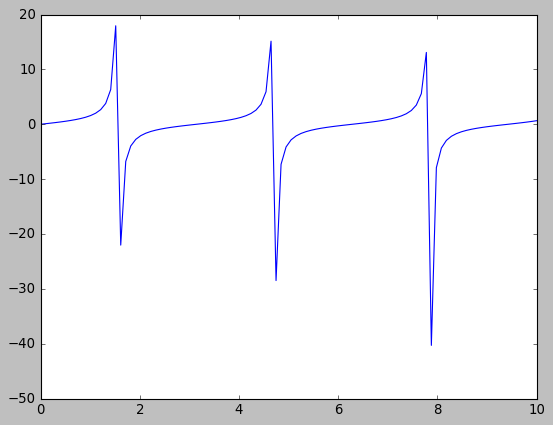

In [47]:
plt.plot(x,np.tan(x))
plt.show()

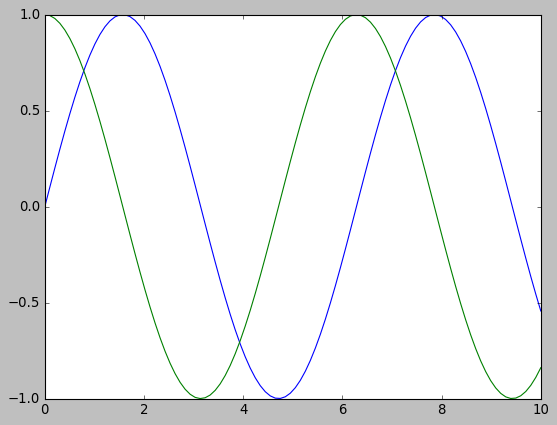

In [48]:
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
plt.show()

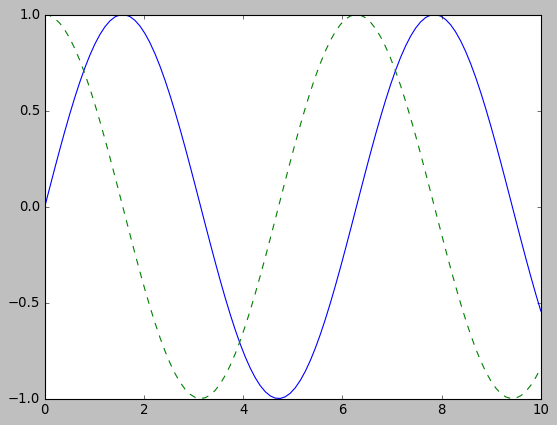

In [49]:
plt.plot(x,np.sin(x),'-') # solid line
plt.plot(x,np.cos(x),'--') # dashed line
plt.show()

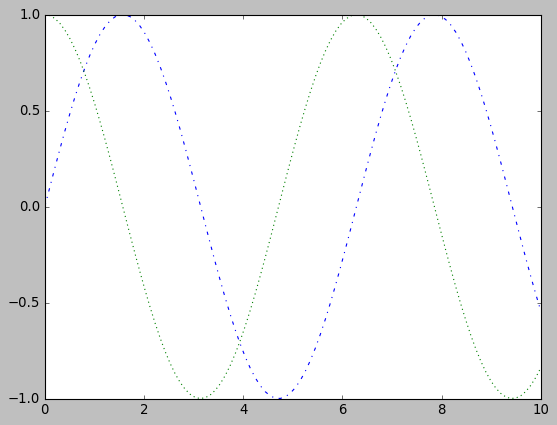

In [50]:
plt.plot(x,np.sin(x),'-.') # dashdot line
plt.plot(x,np.cos(x),':') # dotted line
plt.show()

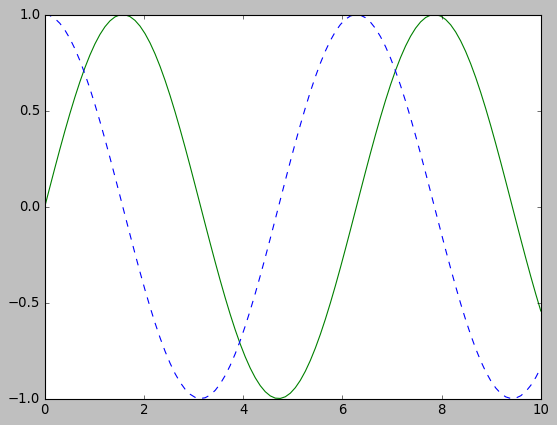

In [51]:
plt.plot(x,np.sin(x),'-', color='green') # solid line
plt.plot(x,np.cos(x),'--') # dashed line
plt.show()

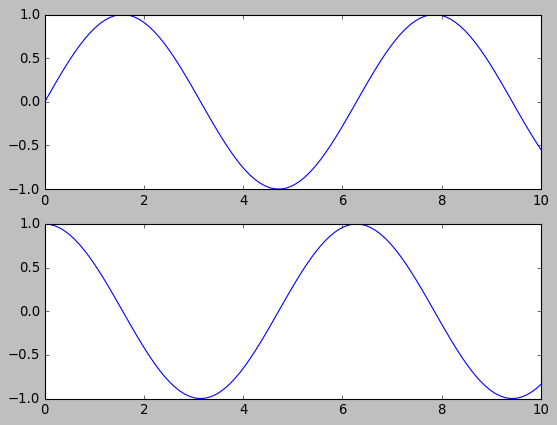

In [52]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(x,np.sin(x))

plt.subplot(2,1,2)
plt.plot(x,np.cos(x))
plt.show()

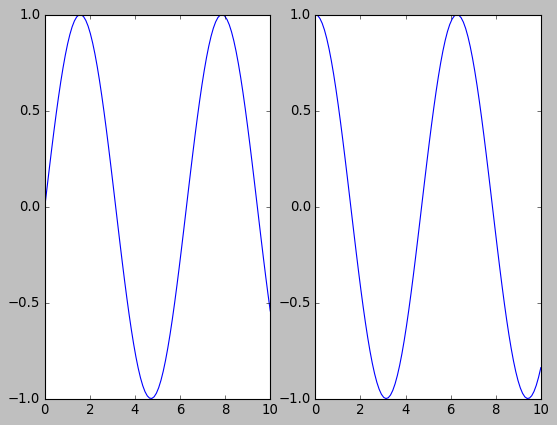

In [53]:
plt.figure()

plt.subplot(1,2,1)
plt.plot(x,np.sin(x))

plt.subplot(1,2,2)
plt.plot(x,np.cos(x))
plt.show()

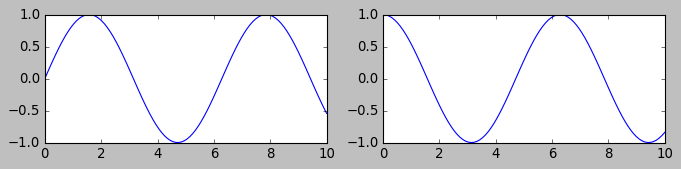

In [54]:
plt.figure(figsize=(10,2))

plt.subplot(1,2,1)
plt.plot(x,np.sin(x))

plt.subplot(1,2,2)
plt.plot(x,np.cos(x))
plt.show()

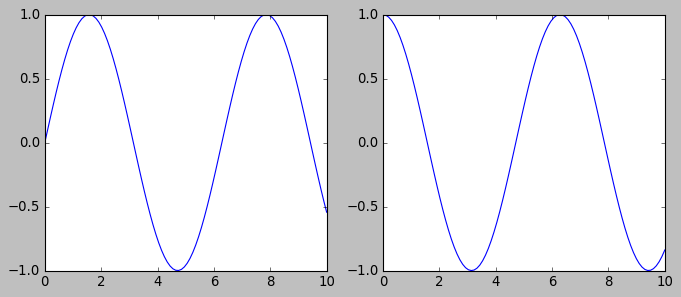

In [55]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x,np.sin(x))

plt.subplot(1,2,2)
plt.plot(x,np.cos(x))
plt.show()

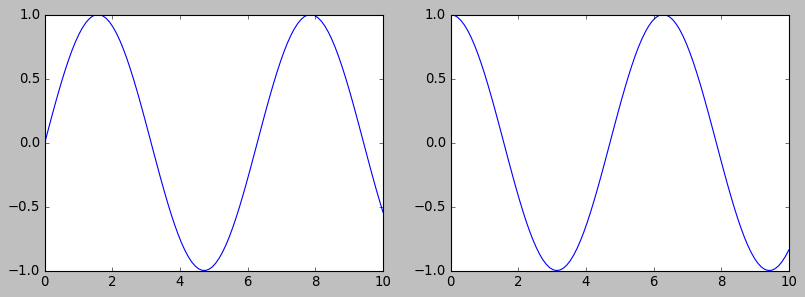

In [56]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(x,np.sin(x))

plt.subplot(1,2,2)
plt.plot(x,np.cos(x))
plt.show()

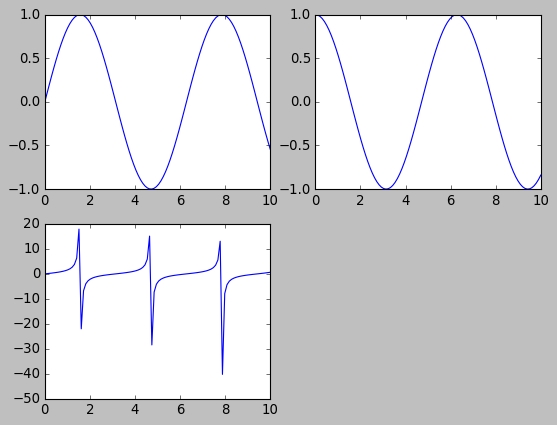

In [57]:
plt.figure()

plt.subplot(2,2,1)
plt.plot(x,np.sin(x))

plt.subplot(2,2,2)
plt.plot(x,np.cos(x))

plt.subplot(2,2,3)
plt.plot(x,np.tan(x))
plt.show()

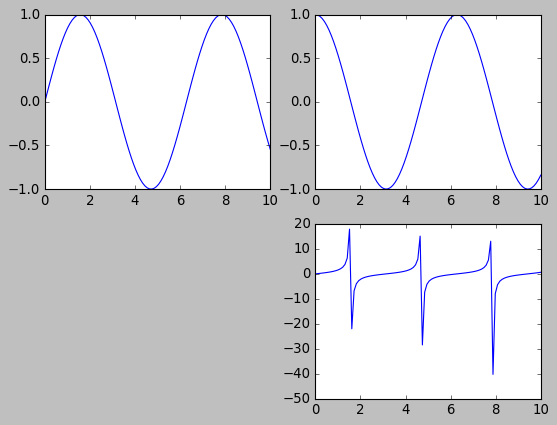

In [58]:
plt.figure()

plt.subplot(2,2,1)
plt.plot(x,np.sin(x))

plt.subplot(2,2,2)
plt.plot(x,np.cos(x))

plt.subplot(2,2,4)
plt.plot(x,np.tan(x))
plt.show()

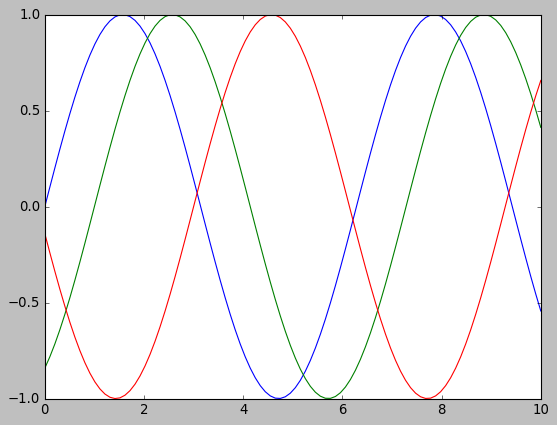

In [63]:
plt.plot(x,np.sin(x-0),color='blue')
plt.plot(x,np.sin(x-1),color='g') # short color code (rgbcmyk)
# https://www.google.com/search?q=rgb&sxsrf=AOaemvLaf-luBZSYVZ1Preox8eV9gBkSIQ:1631113806704&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjrhqW41O_yAhV6wjgGHRj-B20Q_AUoAnoECAEQBA&biw=1440&bih=821#imgrc=07ySKa_Tv3RQMM
plt.plot(x,np.sin(x-3),color=(1.0,0,0)) # RGB tuple, values between 0 and 1

plt.show()

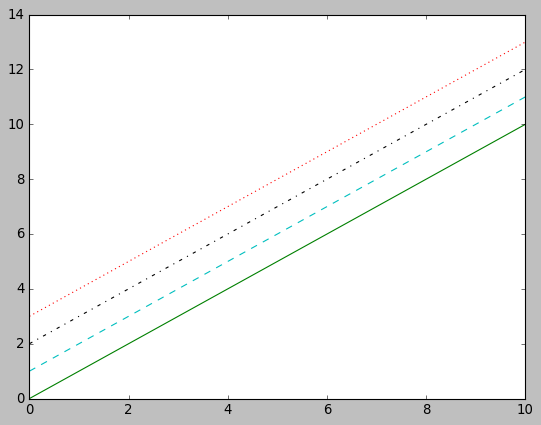

In [64]:
plt.plot(x, x+0, '-g') # solid green
plt.plot(x, x+1, '--c') # dashed cyan
plt.plot(x, x+2, '-.k') # dashdot black
plt.plot(x, x+3, ':r') # dotted red

plt.show()

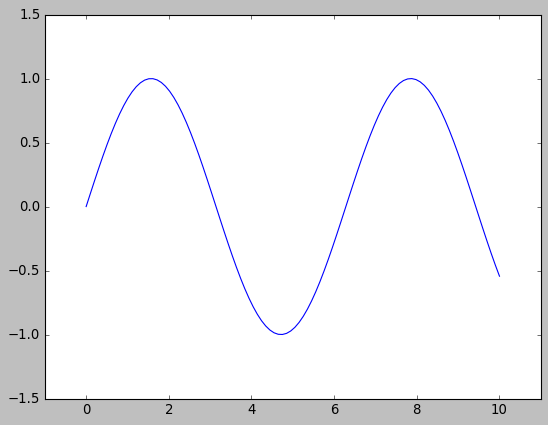

In [67]:
# Adjusting the plots

plt.plot(x, np.sin(x))
plt.ylim(-1.5,1.5)
plt.xlim(-1,11)
plt.show()

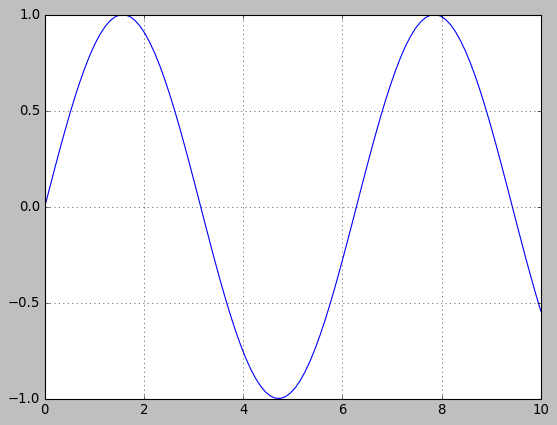

In [71]:
plt.plot(x, np.sin(x))
plt.grid()
plt.show()

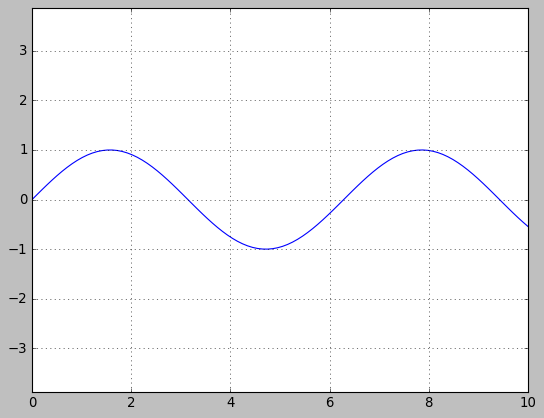

In [72]:
plt.plot(x, np.sin(x))
plt.grid()
plt.axis('equal')
plt.show()

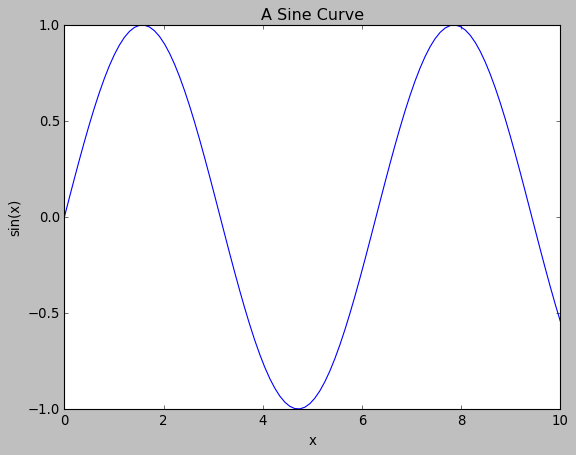

In [77]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")

plt.show()

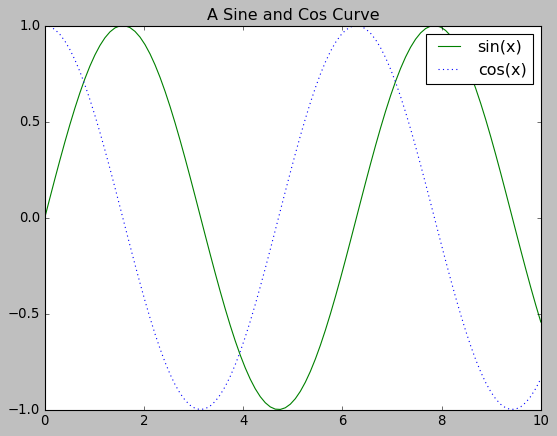

In [81]:
plt.plot(x, np.sin(x),'-g',label='sin(x)')
plt.plot(x, np.cos(x),':b', label='cos(x)')
plt.title("A Sine and Cos Curve")
plt.legend()

plt.show()

## Histogram

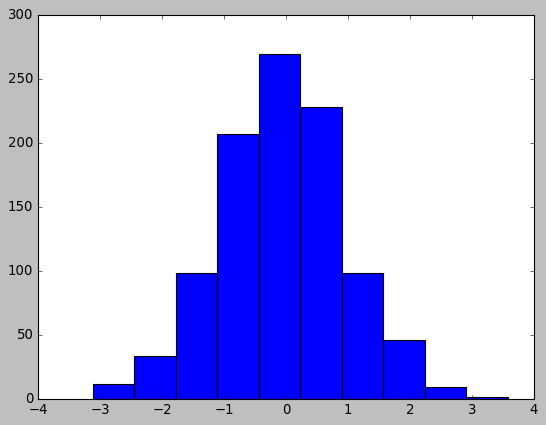

In [97]:
data = np.random.randn(1000)
plt.hist(data) # deafult is 10bins
plt.show()

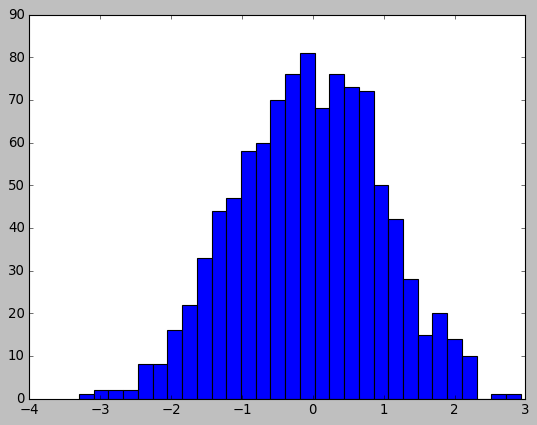

In [98]:
data = np.random.randn(1000)
plt.hist(data, bins=30) # deafult is 10bins
plt.show()

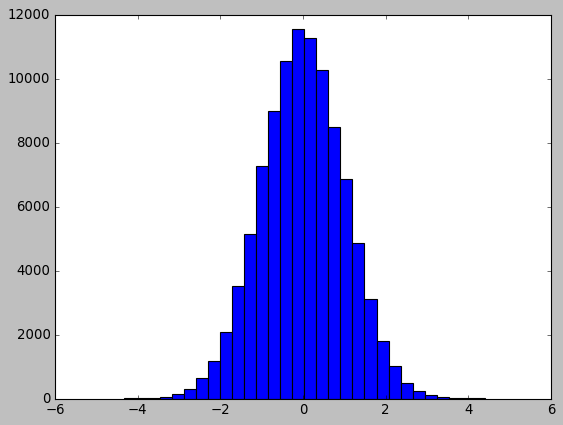

In [99]:
data = np.random.randn(100000)
plt.hist(data, bins=30) # deafult is 10bins
plt.show()

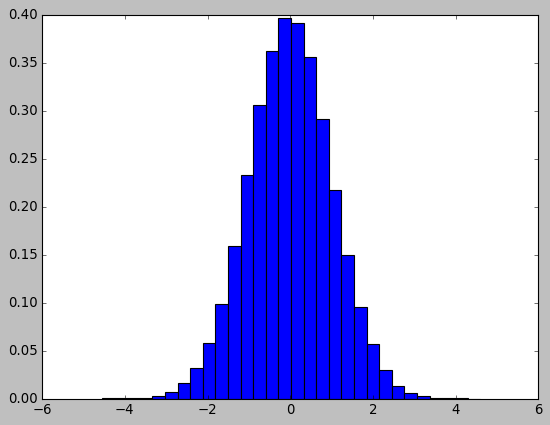

In [101]:
data = np.random.randn(100000)
plt.hist(data, bins=30, density=True) # deafult is 10bins
plt.show()

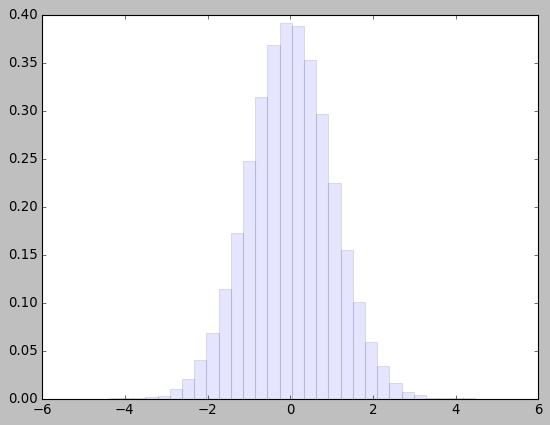

In [102]:
data = np.random.randn(100000)
plt.hist(data, bins=30, density=True, alpha=0.1) # deafult is 10bins
plt.show()

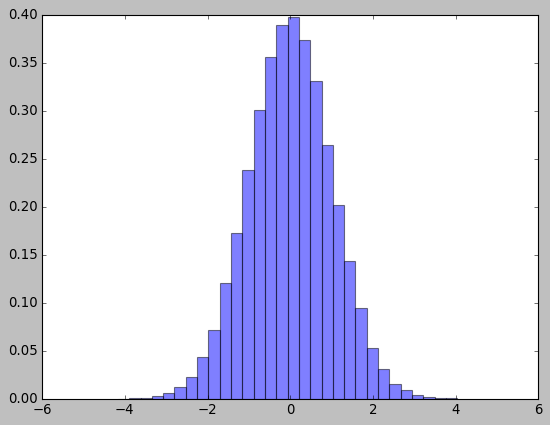

In [103]:
data = np.random.randn(100000)
plt.hist(data, bins=30, density=True, alpha=0.5) # deafult is 10bins
plt.show()

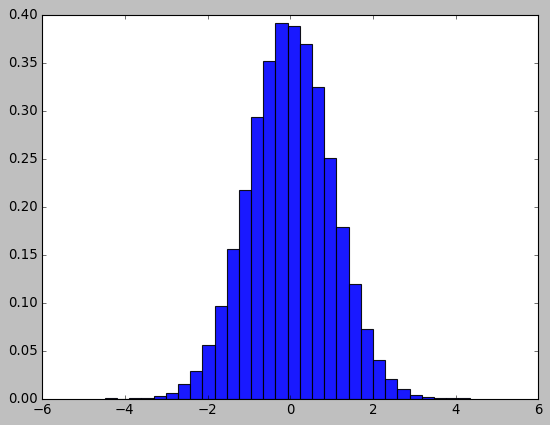

In [104]:
data = np.random.randn(100000)
plt.hist(data, bins=30, density=True, alpha=0.9) # deafult is 10bins
plt.show()
# alpha is the transparency value, 0 to 1

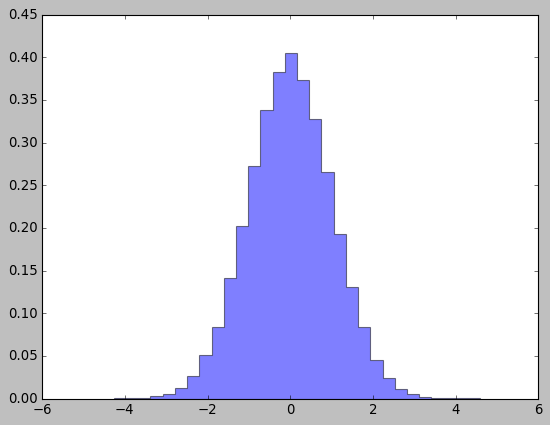

In [105]:
data = np.random.randn(100000)
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled') # deafult is 10bins
plt.show()

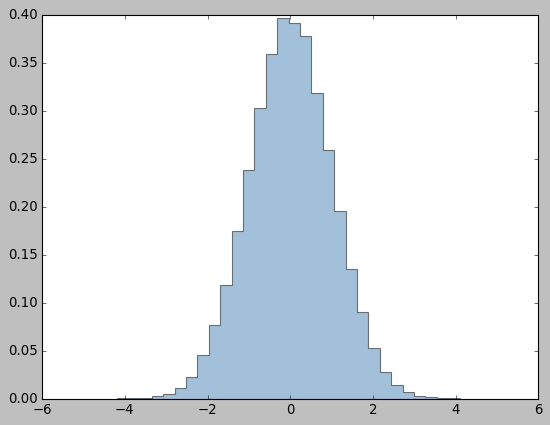

In [106]:
data = np.random.randn(100000)
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue') # default is 10bins
plt.show()

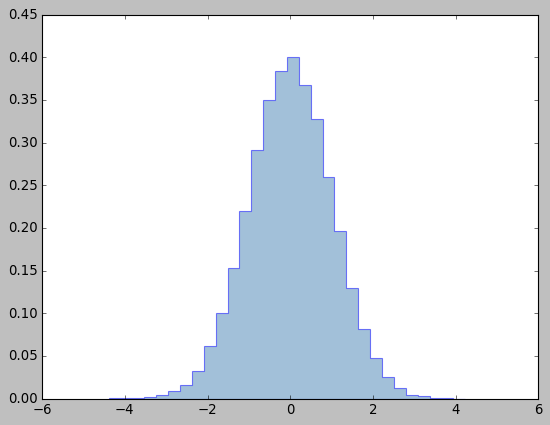

In [107]:
data = np.random.randn(100000)
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='b') # default is 10bins
plt.show()

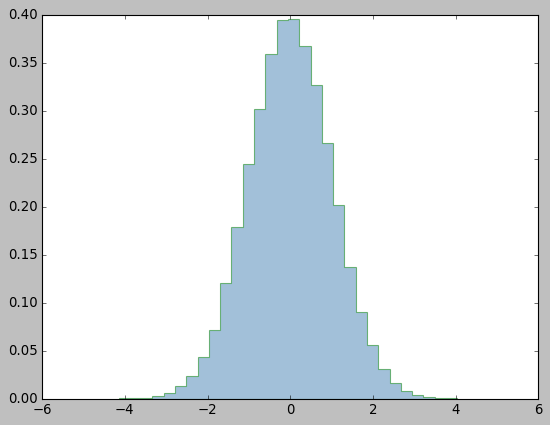

In [108]:
data = np.random.randn(100000)
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='g') # default is 10bins
plt.show()

# Seaborn

## Distribution Plot

In [109]:
import seaborn as sns

In [113]:
sns.get_dataset_names()

URLError: <urlopen error [Errno 61] Connection refused>

URLError: <urlopen error [Errno 61] Connection refused>